# Sentetik Sigorta Müşteri Verisi Üzerinden Analizler

Bu çalışmada, yurtdışı sağlık sigortası alanında faaliyet gösteren bir firmanın operasyonel süreçlerini temsil eden sentetik müşteri verisi oluşturulmuş ve bu veri üzerinden çeşitli analizler ile görselleştirmeler yapılmıştır. Analiz kapsamında müşteri portföyünün ülkelere göre dağılımı, poliçe durumları, prim tutarlarının istatistikleri, hasar bildirimi yapan müşterilerin oranları ve sezonluk eğilimler gibi sigorta sektörü açısından kritik başlıklar ele alınmıştır. Böylece, hem müşteri yapısı hem de iş süreçlerine dair anlamlı öngörüler elde edilmesi amaçlanmıştır.
## Veri Seti Sütun Açıklamaları

| Sütun Adı         | Açıklama |
|-------------------|----------|
| **CustomerID**    | Her müşteriye ait benzersiz kimlik numarası. |
| **Name**          | Müşterinin adı ve soyadı. |
| **Email**         | Müşterinin e-posta adresi. |
| **Phone**         | Müşterinin telefon numarası. |
| **PolicyNumber**  | Sigorta poliçesinin benzersiz numarası. |
| **Country**       | Poliçenin geçerli olduğu ülke. |
| **StartDate**     | Poliçenin başladığı tarih. |
| **EndDate**       | Poliçenin sona erdiği tarih. |
| **Premium**       | Müşterinin ödediği yıllık sigorta primi (USD cinsinden). |
| **Status**        | Poliçenin güncel durumu (Aktif, Yenilenecek, İptal). |
| **LastPaymentDate** | Müşterinin yaptığı son ödemenin tarihi. |
| **HasClaim**      | Müşterinin poliçe süresi boyunca hasar bildirimi (tazminat talebi) yapıp yapmadığı (Evet/Hayır). |

> Bu sütunlar, yurtdışı sağlık sigortası müşterilerine ilişkin temel operasyonel ve analizsel bilgileri kapsamaktadır.


<img src='https://www.ecless.com/images/categories/insurance-3113180_1920.jpg' width=500>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('Health_Insurance.csv')

In [72]:
df.head() #ilk 5 satir

,Unnamed: 0,CustomerID,Name,Email,Phone,PolicyNumber,Country,StartDate,EndDate,Premium,Status,LastPaymentDate,HasClaim
0,0,1001,Fatma Khan,fatma.khan@mail.com,+90-857-378-5488,P51090,İsveç,2024-02-22,2025-02-21,1019,Yenilenecek,2024-12-12,Evet
1,1,1002,Olga Taylor,olga.taylor@mail.com,+90-169-137-4935,P13890,Fransa,2024-01-21,2025-01-20,1090,Aktif,2024-04-19,Hayır
2,2,1003,Tomáš Martinez,tomáš.martinez@mail.com,+90-952-478-3142,P79479,İtalya,2024-01-02,2025-01-01,1271,Yenilenecek,2024-04-17,Hayır
3,3,1004,Hiroshi Novák,hiroshi.novák@mail.com,+90-248-798-5258,P22185,Avustralya,2024-05-03,2025-05-03,742,Aktif,2024-05-18,Evet
4,4,1005,Victor Demir,victor.demir@mail.com,+90-981-883-1833,P22666,Çin,2024-02-10,2025-02-09,1301,İptal,2025-01-03,Hayır


In [74]:
df.tail() #son 5 satir

,Unnamed: 0,CustomerID,Name,Email,Phone,PolicyNumber,Country,StartDate,EndDate,Premium,Status,LastPaymentDate,HasClaim
195,195,1196,Yuki Hassan,yuki.hassan@mail.com,+90-711-344-2134,P28919,Hindistan,2024-02-27,2025-02-26,1543,İptal,2024-10-31,Hayır
196,196,1197,Carlos Suzuki,carlos.suzuki@mail.com,+90-369-118-3515,P49194,İsveç,2024-01-13,2025-01-12,1513,İptal,2024-06-08,Hayır
197,197,1198,Carlos Can,carlos.can@mail.com,+90-944-728-6395,P53526,Hindistan,2024-04-28,2025-04-28,700,İptal,2024-07-20,Hayır
198,198,1199,Samir Tanaka,samir.tanaka@mail.com,+90-811-551-6159,P82525,Çin,2024-04-27,2025-04-27,1137,Yenilenecek,2025-03-11,Evet
199,199,1200,Paul Petrova,paul.petrova@mail.com,+90-652-741-4677,P85277,Fransa,2024-05-26,2025-05-26,377,Yenilenecek,2025-01-29,Hayır


### Sigortalıların Ülkeye Göre Dağılımı Grafiği Açıklaması

Bu grafik, müşteri portföyündeki sigortalıların poliçe satın aldıkları ülkelere göre dağılımını göstermektedir. Her bir bar, ilgili ülkede sigortalı olan müşteri sayısını temsil eder. Bu sayede, şirketin hangi ülke pazarlarında daha fazla müşteri elde ettiği ve potansiyel büyüme alanları kolayca analiz edilebilir.

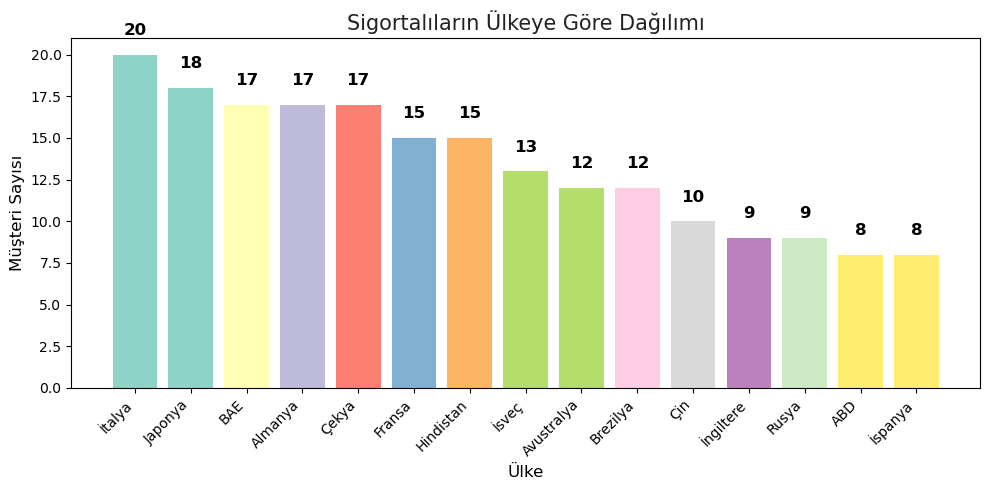

In [49]:
country_counts = df['Country'].value_counts()
countries = country_counts.index
colors = plt.cm.Set3(np.linspace(0, 1, len(countries)))

plt.figure(figsize=(10,5))
bars = plt.bar(countries, country_counts.values, color=colors)
plt.title('Sigortalıların Ülkeye Göre Dağılımı', fontsize=15, color="#222")
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Barların üstüne sayıları ekle
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,  # 1 yukarıdan başlasın, sayı çok küçükse artırabilirsin
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

In [59]:
df.describe()

,Unnamed: 0,CustomerID,StartDate,Premium
count,200.000000,200.000000,200,200.000000
mean,99.500000,1100.500000,2024-03-31 10:04:48,1016.325000
min,0.000000,1001.000000,2024-01-01 00:00:00,252.000000
25%,49.750000,1050.750000,2024-02-18 00:00:00,666.000000
50%,99.500000,1100.500000,2024-04-04 00:00:00,996.500000
75%,149.250000,1150.250000,2024-05-14 12:00:00,1365.000000
max,199.000000,1200.000000,2024-06-27 00:00:00,1799.000000
std,57.879185,57.879185,NaN,443.715762


### Poliçe Durumlarının Oransal Dağılımı Grafiği Açıklaması

Bu pasta grafik, sigorta portföyündeki poliçelerin güncel durumlarının (Aktif, Yenilenecek, İptal) toplam içindeki oranlarını göstermektedir. Her bir dilim, ilgili durumdaki poliçelerin yüzdesini ifade eder. Bu sayede müşteri portföyünün genel durumu hızlıca değerlendirilebilir ve iş süreçlerinin takibi kolaylaşır.

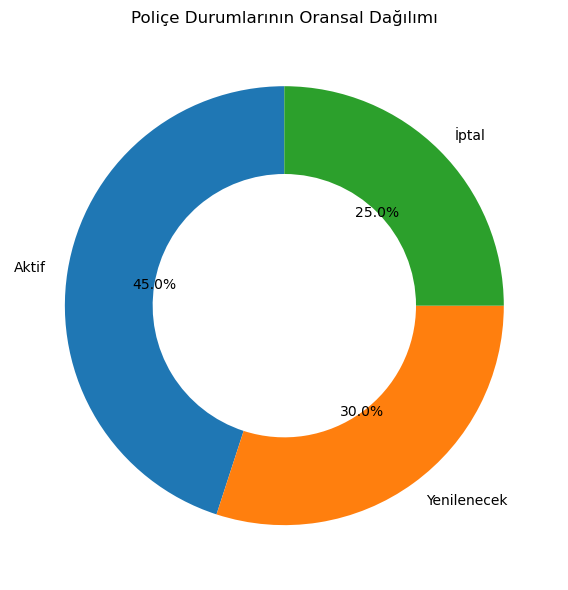

In [23]:
plt.figure(figsize=(6,6))
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Poliçe Durumlarının Oransal Dağılımı')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       200 non-null    int64         
 1   CustomerID       200 non-null    int64         
 2   Name             200 non-null    object        
 3   Email            200 non-null    object        
 4   Phone            200 non-null    object        
 5   PolicyNumber     200 non-null    object        
 6   Country          200 non-null    object        
 7   StartDate        200 non-null    datetime64[ns]
 8   EndDate          200 non-null    object        
 9   Premium          200 non-null    int64         
 10  Status           200 non-null    object        
 11  LastPaymentDate  200 non-null    object        
 12  HasClaim         200 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 20.4+ KB


### Yıllık Prim (USD) Dağılımı Grafiği Açıklaması

Bu histogram, sigorta müşterilerinin ödedikleri yıllık prim (Premium) tutarlarının nasıl dağıldığını göstermektedir. Yatay eksende prim aralıkları, dikey eksende ise bu aralıktaki müşteri sayısı yer alır. Grafik sayesinde, müşterilerin çoğunluğunun hangi prim aralığında yoğunlaştığı ve uç değerlerin varlığı kolayca analiz edilebilir.

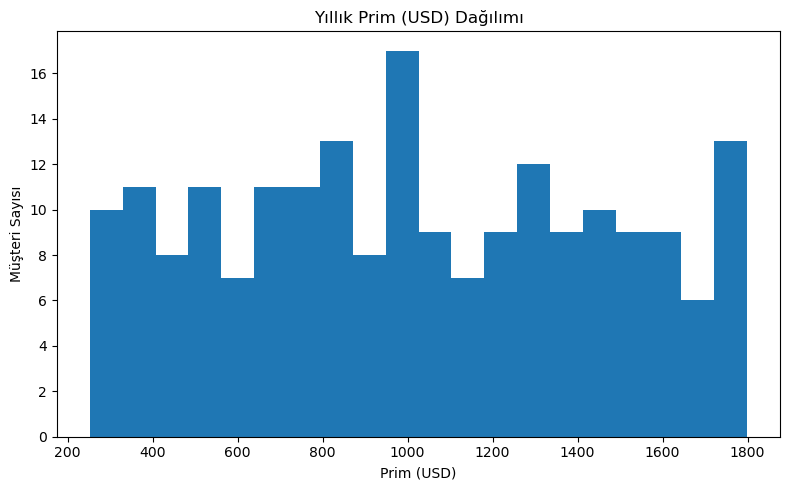

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df['Premium'], bins=20)
plt.title('Yıllık Prim (USD) Dağılımı')
plt.xlabel('Prim (USD)')
plt.ylabel('Müşteri Sayısı')
plt.tight_layout()
plt.show()

### Ülkelere Göre Ortalama Prim (USD) Grafiği Açıklaması

Bu grafik, farklı ülkelere satılan sigorta poliçelerinin ortalama yıllık prim tutarlarını karşılaştırmaktadır. Her bir bar, ilgili ülkede poliçe alan müşterilerin ödediği ortalama primi (USD cinsinden) gösterir. Bu sayede, hangi ülkelerde sigorta ürünlerinin daha yüksek veya daha düşük fiyatlandığı kolayca analiz edilebilir ve fiyatlandırma stratejileri buna göre geliştirilebilir.


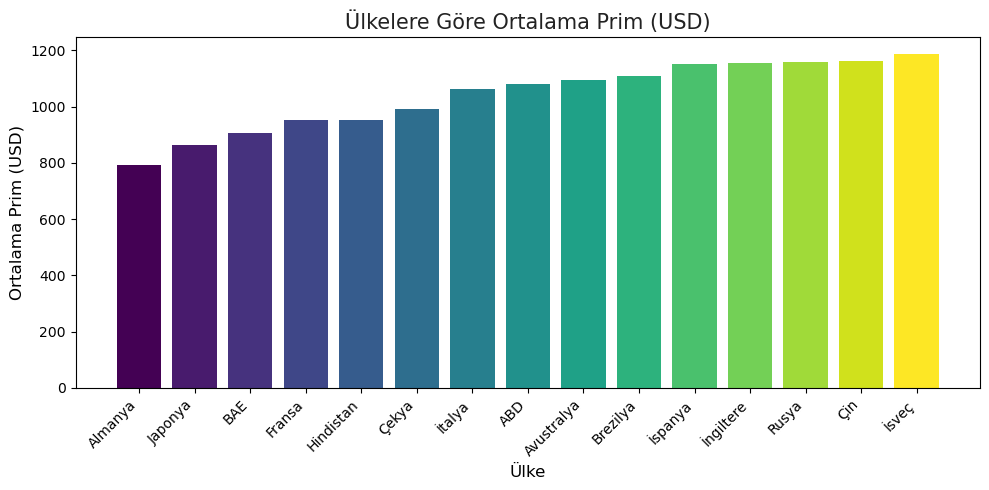

In [45]:
import matplotlib.pyplot as plt
import numpy as np

mean_premium = df.groupby('Country')['Premium'].mean().sort_values()
countries = mean_premium.index
colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))  # Viridis renk paletiyle renk dağıtımı

plt.figure(figsize=(10,5))
bars = plt.bar(countries, mean_premium, color=colors)
plt.title('Ülkelere Göre Ortalama Prim (USD)', fontsize=15, color="#222")
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Ortalama Prim (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Poliçe Durumu ve Hasar Bildirim Durumu Grafiği Açıklaması

Bu grafik, poliçelerin güncel durumu (Aktif, Yenilenecek, İptal) ile hasar bildirimi yapılıp yapılmadığını birlikte göstermektedir. Her bir bar, poliçe durumuna göre hasar bildirimi yapan ve yapmayan müşteri sayılarını karşılaştırır. Bu sayede, örneğin iptal edilen veya yenilenecek poliçelerde hasar bildirimi oranlarının farklı olup olmadığı kolayca analiz edilebilir.

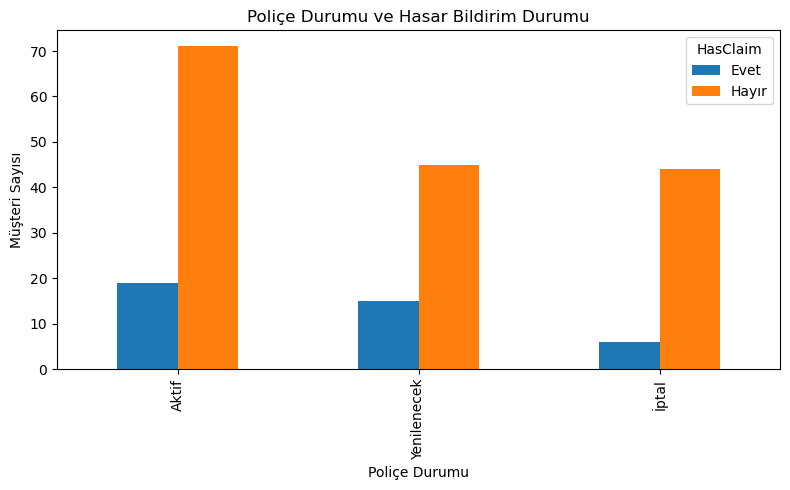

In [29]:
hasar_durum = pd.crosstab(df['Status'], df['HasClaim'])
hasar_durum.plot(kind='bar', figsize=(8,5))
plt.title('Poliçe Durumu ve Hasar Bildirim Durumu')
plt.xlabel('Poliçe Durumu')
plt.ylabel('Müşteri Sayısı')
plt.tight_layout()
plt.show()

### Hasar Oranı En Yüksek 5 Ülke Grafiği Açıklaması

Bu grafik, sigorta poliçelerinde hasar bildirimi (tazminat talebi) oranı en yüksek olan ilk 5 ülkeyi göstermektedir. Her bir bar, ilgili ülkede hasar bildirimi yapan müşterilerin toplam müşteri sayısına oranını (% olarak) ifade eder. Grafik sayesinde, hangi ülkelerde riskin ve tazminat taleplerinin daha yüksek olduğu kolayca tespit edilebilir. Bu bilgi, fiyatlandırma ve risk yönetimi açısından önemlidir.

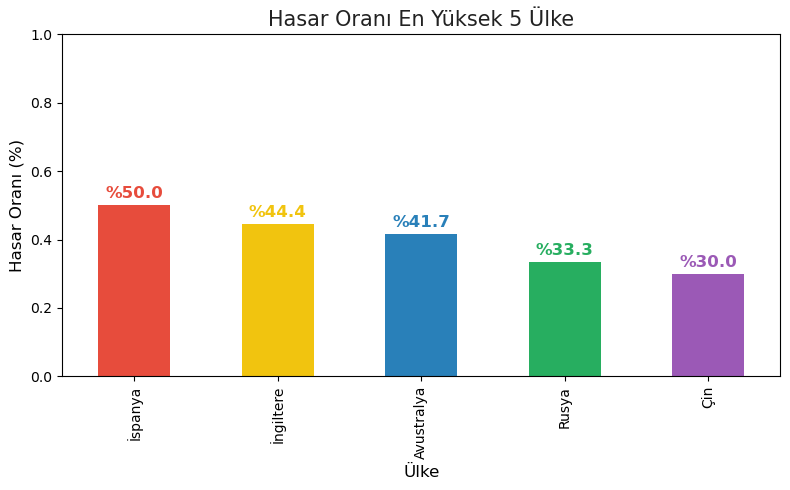

In [43]:
colors = ['#e74c3c', '#f1c40f', '#2980b9', '#27ae60', '#9b59b6']  # 5 canlı renk

hasar_orani = df.groupby('Country')['HasClaim'].value_counts(normalize=True).unstack()['Evet']
hasar_orani = hasar_orani.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
bars = hasar_orani.plot(kind='bar', color=colors)

plt.title('Hasar Oranı En Yüksek 5 Ülke', fontsize=15, color="#222")
plt.xlabel('Ülke', fontsize=12)
plt.ylabel('Hasar Oranı (%)', fontsize=12)
plt.ylim(0,1)

# Yüzde olarak barların üstüne yazı ekle
for i, v in enumerate(hasar_orani):
    plt.text(i, v + 0.02, f"%{v*100:.1f}", ha='center', fontsize=12, fontweight='bold', color=colors[i])

plt.tight_layout()
plt.show()

### Hasar Bildirimi ve Yıllık Prim Dağılımı Grafiği Açıklaması

Bu grafik, yıllık sigorta primi tutarlarının (Premium), hasar bildirimi yapan ve yapmayan müşteriler arasında nasıl dağıldığını karşılaştırmaktadır. Kutucuklar, her iki grup için primlerin medyan, çeyrekler ve uç değerlerini gösterir. Böylece hasar bildirimi ile yüksek/düşük prim ilişkisi analiz edilebilir; örneğin hasar bildirenlerde primlerin daha yüksek veya daha düşük olup olmadığı gözlemlenebilir.

<Figure size 800x500 with 0 Axes>

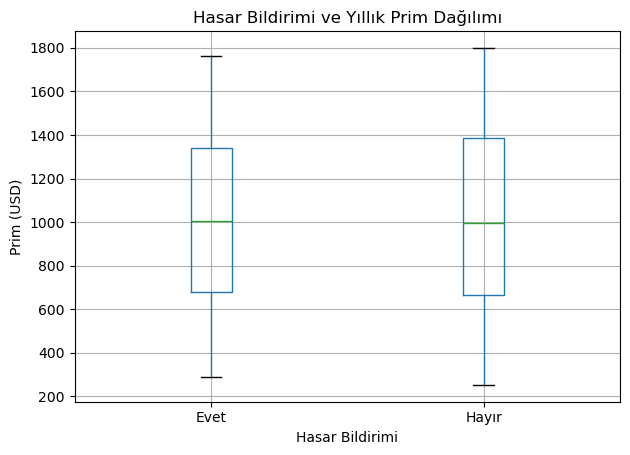

In [33]:
plt.figure(figsize=(8,5))
df.boxplot(column='Premium', by='HasClaim')
plt.title('Hasar Bildirimi ve Yıllık Prim Dağılımı')
plt.suptitle('')
plt.xlabel('Hasar Bildirimi')
plt.ylabel('Prim (USD)')
plt.tight_layout()
plt.show()

In [37]:
df['StartDate'] = pd.to_datetime(df['StartDate'])

### Aylara Göre Poliçe Başlangıç Sayısı Grafiği Açıklaması

Bu grafik, yeni sağlık sigortası poliçelerinin yılın hangi aylarında başlatıldığını göstermektedir. Yüksek barlar, o ayda poliçe başlatma talebinin arttığını; düşük barlar ise daha az poliçe başlatıldığını ifade eder. Böylece şirket, en yoğun dönemleri belirleyerek operasyonel planlama ve pazarlama stratejilerini buna göre şekillendirebilir.

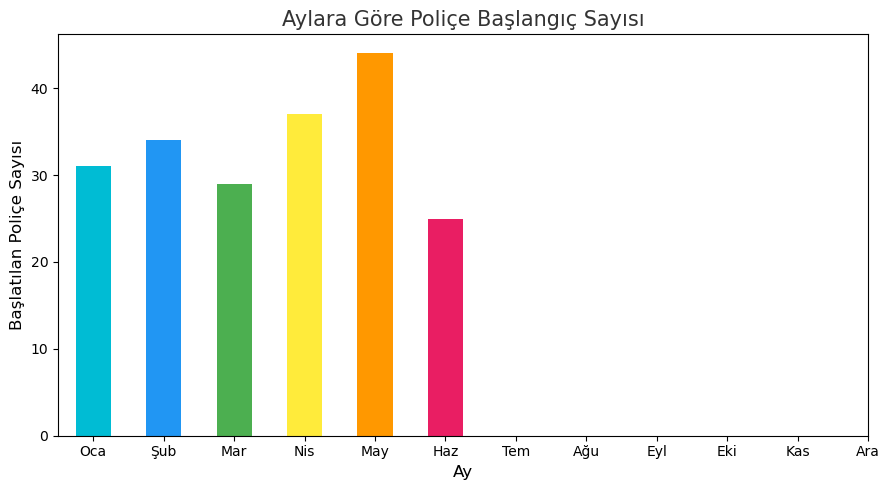

In [41]:
import matplotlib.pyplot as plt

# Renk paleti (her ay için farklı renk)
colors = [
    "#00bcd4", "#2196f3", "#4caf50", "#ffeb3b", "#ff9800", "#e91e63",
    "#9c27b0", "#8bc34a", "#ffc107", "#f44336", "#607d8b", "#795548"
]

aylar = df['StartDate'].dt.month.value_counts().sort_index()
plt.figure(figsize=(9,5))
aylar.plot(kind='bar', color=colors)
plt.title('Aylara Göre Poliçe Başlangıç Sayısı', fontsize=15, color="#333333")
plt.xlabel('Ay', fontsize=12)
plt.ylabel('Başlatılan Poliçe Sayısı', fontsize=12)
plt.xticks(range(0,12), ['Oca','Şub','Mar','Nis','May','Haz','Tem','Ağu','Eyl','Eki','Kas','Ara'], rotation=0)
plt.tight_layout()
plt.show()